<a href="https://colab.research.google.com/github/NewTAs/ODCuC/blob/main/ODCuC_220107_Try2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf

from google.colab import drive
drive.mount('Lee_dataset')

Mounted at Lee_dataset


In [2]:
numberOfClass = 2
pictureWeightHeightSize = 224

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_Datasets/11/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),
        batch_size=numberOfClass,
        class_mode='categorical')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_Datasets/12/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')

Found 360 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications import ResNet152V2

model = ResNet152V2(include_top=True, weights=None, input_shape=(224, 224, 3), pooling=max, classes=2)

In [4]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

In [5]:
model.fit(train_generator, epochs=100, validation_data=test_generator)

Epoch 1/100
180/180 [==============================] - 188s 881ms/step - loss: 0.7230 - accuracy: 0.6639 - val_loss: 5.9484 - val_accuracy: 0.5000
Epoch 2/100
180/180 [==============================] - 54s 299ms/step - loss: 0.4219 - accuracy: 0.8000 - val_loss: 6.8758 - val_accuracy: 0.5833
Epoch 3/100
180/180 [==============================] - 54s 299ms/step - loss: 0.3321 - accuracy: 0.8500 - val_loss: 2.4569 - val_accuracy: 0.5000
Epoch 4/100
180/180 [==============================] - 54s 299ms/step - loss: 0.3381 - accuracy: 0.8778 - val_loss: 89.7258 - val_accuracy: 0.5000
Epoch 5/100
180/180 [==============================] - 54s 299ms/step - loss: 0.2492 - accuracy: 0.9083 - val_loss: 0.5022 - val_accuracy: 0.6667
Epoch 6/100
180/180 [==============================] - 54s 299ms/step - loss: 0.0512 - accuracy: 0.9833 - val_loss: 4.4219 - val_accuracy: 0.5000
Epoch 7/100
180/180 [==============================] - 54s 298ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0018

In [6]:
print("-- Evaluate --")
scores = model.evaluate(test_generator)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
60/60 [==============================] - 5s 84ms/step - loss: 0.0037 - accuracy: 1.0000
accuracy: 100.00%


In [7]:
import matplotlib.pyplot as plt

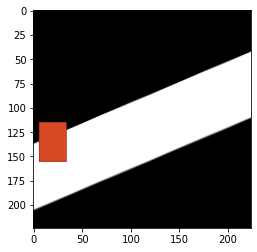

In [8]:
img_path = '/content/Lee_dataset/MyDrive/Lee_dataset/13/0/001.png'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [9]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/001/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/001.png']
{'0': 0}
[[0.030 0.970]]


In [10]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/002/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/002.png']
{'0': 0}
[[0.000 1.000]]


In [11]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/003/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/003.png']
{'0': 0}
[[0.000 1.000]]


In [12]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/004/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/004.png']
{'0': 0}
[[0.999 0.001]]


In [13]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/005/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/005.png']
{'0': 0}
[[0.001 0.999]]


In [14]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/006/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/006.png']
{'0': 0}
[[0.998 0.002]]


In [15]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/007/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/007.png']
{'0': 0}
[[0.999 0.001]]


In [16]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/008/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/008.png']
{'0': 0}
[[0.012 0.988]]


In [17]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/009/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/009.png']
{'0': 0}
[[0.000 1.000]]


In [18]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/010/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/010.png']
{'0': 0}
[[0.011 0.989]]
